# GEOG696C Spatiotemporal Data Analysis
## Homework #3
Alex Saunders | Last updated: 24 September 2023

In [1]:
from pathlib import Path
import os
import sys
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt, colors
from matplotlib.collections import LineCollection
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.patheffects as pe
from datetime import datetime
import calendar
import scipy
import xarray
# import matplotlib.ticker as ticker
# from matplotlib.ticker import MultipleLocator

In [3]:
# Set the root path
rootPath = Path('C:/Users/alexa/Documents/GitHub/spatiotemporal_data_analysis/00_hw')
# rootPath = Path('C:/Users/alexsaunders/Documents/01_uoa/04_git/spatiotemporal_data_analysis/00_hw')
dataPath = rootPath/'data'

## 2. Load the FAO cereal production data

In [13]:
cerealData = pd.read_excel(dataPath/'cereal_production_WB_FAO_2022.xlsx', index_col=0)

## 3. Drop countries with missing data years

In [18]:
cerealData = cerealData.dropna(axis=1, how='any')

In [19]:
cerealData

,Afghanistan [AFG],Albania [ALB],Algeria [DZA],Angola [AGO],Argentina [ARG],Australia [AUS],Austria [AUT],"Bahamas, The [BHS]",Bangladesh [BGD],Barbados [BRB],...,Uganda [UGA],United Kingdom [GBR],United States [USA],Uruguay [URY],Vanuatu [VUT],"Venezuela, RB [VEN]",Vietnam [VNM],"Yemen, Rep. [YEM]",Zambia [ZMB],Zimbabwe [ZWE]
Time,,,,,,,,,,,,,,,,,,,,,
1961,3695000.00,293932.0,937596.00,544000.00,14512100.00,9149882.00,2274011.00,100.00,14523696.00,716.00,...,895200.00,9721851,1.636200e+08,750924.00,350.00,501394.00,9289600.00,938400,766608.00,1266453.00
1962,3696000.00,313508.0,2369800.00,543000.00,13961600.00,11143648.00,2305937.00,150.00,13408128.00,899.00,...,902000.00,11790944,1.624558e+08,764645.00,350.00,644230.00,10061125.00,963100,748934.00,1225137.00
1963,3378000.00,293449.0,2324215.00,515000.00,17331100.00,11812267.00,2229471.00,200.00,16042664.00,708.00,...,912650.00,11364849,1.748125e+08,596786.00,350.00,562385.00,9876510.00,978600,676717.00,1030933.00
1964,3732000.00,350144.0,1487506.00,564000.00,20821300.00,13001568.00,2349312.00,250.00,15842004.00,508.00,...,923300.00,12799102,1.609371e+08,914783.00,350.00,644148.00,10016630.00,1002700,773214.00,1028799.00
1965,3785000.00,335293.0,1735461.00,562000.00,13843800.00,9684056.00,2019628.00,300.00,15852140.00,560.00,...,1057750.00,13716688,1.836026e+08,878083.00,350.00,725873.00,9688800.00,995900,816214.00,1134571.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017,4892953.97,701734.0,3478175.14,2496326.75,76397452.56,50049458.35,4874849.22,647.78,58495624.00,73.86,...,3412916.00,23000066,4.402718e+08,3565340.74,904.19,1915874.44,47877218.26,358355,3895117.44,1748338.91
2018,4133051.85,678196.0,6066252.82,2877568.65,70591420.02,33860811.85,4787200.00,680.05,58811726.54,109.30,...,4075377.00,21084346,4.397079e+08,2513487.29,912.91,1627460.00,48923673.32,344648,2602942.73,1780775.58
2019,5583461.00,666065.0,5633596.78,2920676.35,83616257.66,29235685.26,5399310.00,662.12,59181759.37,42.00,...,3119000.00,25517303,4.208699e+08,3564982.52,921.96,1579755.00,48231531.65,456714,2225768.76,1023357.91


## 4. Modify the columns to have mean of zero and stdev of 1 i.e. a z score

In [21]:
cerealZScore = scipy.stats.zscore(cerealData, axis=1, ddof=1, nan_policy='omit')

In [29]:
# Check that columns have mean of zero and stdev of 1
print(np.unique(cerealZScore.mean(axis=1)))
print(np.unique(cerealZScore.std(axis=1)))

[-9.41775393e-17 -8.00126249e-17 -7.04417367e-17 -6.37421150e-17
 -6.10622664e-17 -5.72339111e-17 -5.22570493e-17 -4.82372762e-17
 -4.13462368e-17 -3.77092993e-17 -3.54122861e-17 -3.21581842e-17
 -3.02440065e-17 -2.94783355e-17 -2.29701315e-17 -1.97160296e-17
 -1.79932697e-17 -1.66533454e-17 -1.62705098e-17 -1.33992434e-17
 -1.22507368e-17 -1.09108125e-17 -8.99663485e-18 -8.80521709e-18
 -6.12536841e-18 -4.59402631e-18 -1.14850658e-18 -3.82835526e-19
 -1.91417763e-19  2.10559539e-18  3.63693749e-18  4.59402631e-18
  5.93395065e-18  8.23096380e-18  1.05279770e-17  1.07193947e-17
  1.16764835e-17  1.26335723e-17  1.30164079e-17  1.56962566e-17
  1.78018519e-17  1.83761052e-17  2.04817006e-17  2.20130427e-17
  2.22044605e-17  2.64156513e-17  2.67984868e-17  2.75641579e-17
  3.69436282e-17  4.32604144e-17  4.74716052e-17  5.41712269e-17
  6.45077861e-17  7.61842696e-17  1.01642832e-16  1.27101395e-16]
[1. 1. 1. 1. 1. 1. 1.]


Now each column has equal variances, meaning that calculating the covariance of a matrix with every column with mean 0 and stdev 1 is the same as calculating the correlation matrix.

__Why use the normalized (to equal variance) data (the correlation matrix) versus the original data?__

To start with, normalizing the cereal production values will enable more direct comparison across countries, by removing the absolute size of the production and isolating the relative changes between years.

From Overland and Preisendorfer (1982), using the covariance matrix for empirical othorgonal functions to obtain the eigenvalues, generates relative maxima with large magnitude, than using the correlation matrix. The correlation matrix removes the effect of the variance of the individual variables, leaving only the influence of spatial correlation. This is advantageous where we are specifically concerned with the spatial oscillations or variations. In our case, we want to compare between countries and identify correlation between countries annual production variability, therefore removing this effect of absolute magnitude and magntiude of dispersion is helpful.

This is intuitive in a way, since if we are trying to detect where one country's production fluctuates in harmony with another country's, we don't want large magnitude signals dominating. We want everything to be standardized, so the relative fluctuations are in an equal magnitude.

## 5. Calculate the covariance of the normalized cereal data and the Singular Value Decomposition (SVD)

In [121]:
# Ge the covariance matrix (this is the correlation matrix, since we have normalized)
cerealCov = np.cov(cerealZScore, rowvar=False, ddof=1)
print(cerealCov.shape)

(145, 145)


In [122]:
# Do SVD, here using numpy
U, s, Vt = np.linalg.svd(cerealCov)
print(U.shape)
print(s.shape)
print(Vt.shape)

(145, 145)
(145,)
(145, 145)


In [123]:
# U is the scores (or time coefficients) of the EOF modes
U

array([[-0.02291545,  0.00451624, -0.00717105, ...,  0.0063117 ,
         0.00055091,  0.0051056 ],
       [-0.00027055, -0.01814367,  0.00919935, ..., -0.00413648,
        -0.00048386, -0.00073528],
       [-0.00281833,  0.0068324 ,  0.01109907, ..., -0.00225226,
        -0.00019831,  0.00037682],
       ...,
       [-0.00621592, -0.00933063, -0.00150024, ..., -0.11501865,
        -0.04311742, -0.12132174],
       [ 0.00244631, -0.00331236,  0.0176464 , ..., -0.02435195,
        -0.04363225,  0.07126026],
       [-0.00929817, -0.02458287, -0.00896563, ..., -0.0035296 ,
        -0.00145425, -0.05430101]])

In [124]:
# Flip the sign of the eigen vector 1 so it trends positive rather than negative (which is arbitary anyway)
# U[:,0] = -U[:,0]

In [125]:
# Multiply the normalized data matrix with the eigenvector matrix to get the signal0s
pcs = cerealZScore @ U

In [126]:
pcs

,0,1,2,3,4,5,6,7,8,9,...,135,136,137,138,139,140,141,142,143,144
Time,,,,,,,,,,,,,,,,,,,,,
1961,-2.559052,0.667894,0.449595,1.696386,-0.326574,-0.186548,0.056975,-1.104067,1.337870,3.271145,...,0.105972,-0.030561,-0.04568,-0.145322,-0.014745,0.014266,0.071209,0.037622,0.045522,-0.066127
1962,-2.207102,0.215153,0.205359,1.634982,-0.169178,0.267115,0.327533,-1.416525,1.457116,3.411035,...,0.105972,-0.030561,-0.04568,-0.145322,-0.014745,0.014266,0.071209,0.037622,0.045522,-0.066127
1963,-1.984021,-0.091418,0.423086,1.459311,-0.117668,0.223496,0.473508,-1.479493,1.494347,3.444377,...,0.105972,-0.030561,-0.04568,-0.145322,-0.014745,0.014266,0.071209,0.037622,0.045522,-0.066127
1964,-0.996983,-0.268854,0.278572,1.348610,-0.361624,0.090153,0.408649,-1.340113,1.611006,3.461461,...,0.105972,-0.030561,-0.04568,-0.145322,-0.014745,0.014266,0.071209,0.037622,0.045522,-0.066127
1965,-1.561695,-0.918976,0.920822,1.517031,-0.171287,0.448333,0.237108,-1.191515,1.486249,3.443330,...,0.105972,-0.030561,-0.04568,-0.145322,-0.014745,0.014266,0.071209,0.037622,0.045522,-0.066127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017,1.606216,-0.317369,1.280046,1.326154,-0.429888,0.185823,0.265593,-1.456845,1.399715,3.415833,...,0.105972,-0.030561,-0.04568,-0.145322,-0.014745,0.014266,0.071209,0.037622,0.045522,-0.066127
2018,1.593538,-0.262449,1.187638,1.425274,-0.174653,0.008899,0.266767,-1.418032,1.420935,3.361782,...,0.105972,-0.030561,-0.04568,-0.145322,-0.014745,0.014266,0.071209,0.037622,0.045522,-0.066127
2019,1.825679,-0.190042,1.147037,1.131279,-0.216657,0.138612,0.141811,-1.468437,1.614818,3.394651,...,0.105972,-0.030561,-0.04568,-0.145322,-0.014745,0.014266,0.071209,0.037622,0.045522,-0.066127


## 6. Scale the PCs so that we can more directly compare our new time series with the original data

Scale the time series using the eigen values to get back to the original variance of the series but with the time evolution of our new signals

In [127]:
# Divide the PCs by the square root of their respective eigenvalues
pcsScaled = pcs / np.sqrt(s)
# pcsScaled = pcs / s

In [128]:
pcsScaled

,0,1,2,3,4,5,6,7,8,9,...,135,136,137,138,139,140,141,142,143,144
Time,,,,,,,,,,,,,,,,,,,,,
1961,-2.048400,1.449276,1.333769,7.212275,-2.143653,-1.325895,0.436429,-9.867854,14.166040,44.303451,...,8.505635e+06,-2.452924e+06,-3.666449e+06,-1.166400e+07,-1.183447e+06,1.145043e+06,5.715438e+06,3.019663e+06,3.653761e+06,-5.307564e+06
1962,-1.766680,0.466864,0.609217,6.951211,-1.110496,1.898529,2.508919,-12.660516,15.428669,46.198091,...,8.505635e+06,-2.452924e+06,-3.666449e+06,-1.166400e+07,-1.183447e+06,1.145043e+06,5.715438e+06,3.019663e+06,3.653761e+06,-5.307564e+06
1963,-1.588115,-0.198371,1.255127,6.204337,-0.772384,1.588510,3.627090,-13.223305,15.822892,46.649662,...,8.505635e+06,-2.452924e+06,-3.666449e+06,-1.166400e+07,-1.183447e+06,1.145043e+06,5.715438e+06,3.019663e+06,3.653761e+06,-5.307564e+06
1964,-0.798038,-0.583391,0.826412,5.733685,-2.373723,0.640768,3.130269,-11.977565,17.058143,46.881047,...,8.505635e+06,-2.452924e+06,-3.666449e+06,-1.166400e+07,-1.183447e+06,1.145043e+06,5.715438e+06,3.019663e+06,3.653761e+06,-5.307564e+06
1965,-1.250063,-1.994104,2.731713,6.449737,-1.124338,3.186545,1.816258,-10.649442,15.737152,46.635482,...,8.505635e+06,-2.452924e+06,-3.666449e+06,-1.166400e+07,-1.183447e+06,1.145043e+06,5.715438e+06,3.019663e+06,3.653761e+06,-5.307564e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017,1.285700,-0.688664,3.797388,5.638215,-2.821816,1.320746,2.034455,-13.020882,14.820878,46.263067,...,8.505635e+06,-2.452924e+06,-3.666449e+06,-1.166400e+07,-1.183447e+06,1.145043e+06,5.715438e+06,3.019663e+06,3.653761e+06,-5.307564e+06
2018,1.275552,-0.569494,3.523250,6.059628,-1.146432,0.063250,2.043444,-12.673988,15.045568,45.531015,...,8.505635e+06,-2.452924e+06,-3.666449e+06,-1.166400e+07,-1.183447e+06,1.145043e+06,5.715438e+06,3.019663e+06,3.653761e+06,-5.307564e+06
2019,1.461370,-0.412375,3.402801,4.809690,-1.422152,0.985192,1.086281,-13.124492,17.098501,45.976184,...,8.505635e+06,-2.452924e+06,-3.666449e+06,-1.166400e+07,-1.183447e+06,1.145043e+06,5.715438e+06,3.019663e+06,3.653761e+06,-5.307564e+06


## 7. Identify which countries are contributing to the two primary signals

In [131]:
# For each of the two first modes, find the eigenvector loadings that are positive
eof1 = U[:,0]
eof2 = U[:,1]
eof1Countries = list(cerealZScore.columns[eof1<0])
eof2Countries = list(cerealZScore.columns[eof2>0])
print('EOF1 contributing countries: {0}\ Total of {1} countries'.format(eof1Countries, len(eof1Countries)))
print('EOF2 contributing countries: {0}\ Total of {1} countries'.format(eof2Countries, len(eof2Countries)))

EOF1 contributing countries: ['Afghanistan [AFG]', 'Albania [ALB]', 'Algeria [DZA]', 'Austria [AUT]', 'Bulgaria [BGR]', 'Canada [CAN]', 'Chile [CHL]', 'Colombia [COL]', 'Denmark [DNK]', 'Finland [FIN]', 'France [FRA]', 'Germany [DEU]', 'Greece [GRC]', 'Haiti [HTI]', 'Hungary [HUN]', 'Iraq [IRQ]', 'Ireland [IRL]', 'Italy [ITA]', 'Japan [JPN]', 'Kenya [KEN]', "Korea, Dem. People's Rep. [PRK]", 'Korea, Rep. [KOR]', 'Madagascar [MDG]', 'Malaysia [MYS]', 'Morocco [MAR]', 'Netherlands [NLD]', 'New Zealand [NZL]', 'Norway [NOR]', 'Poland [POL]', 'Portugal [PRT]', 'Romania [ROU]', 'South Africa [ZAF]', 'Spain [ESP]', 'Sweden [SWE]', 'Switzerland [CHE]', 'Tunisia [TUN]', 'Turkiye [TUR]', 'United Kingdom [GBR]', 'United States [USA]', 'Yemen, Rep. [YEM]', 'Zimbabwe [ZWE]']\ Total of 41 countries
EOF2 contributing countries: ['Afghanistan [AFG]', 'Algeria [DZA]', 'Angola [AGO]', 'Argentina [ARG]', 'Bangladesh [BGD]', 'Bolivia [BOL]', 'Brazil [BRA]', 'Burkina Faso [BFA]', 'Cambodia [KHM]', 'Camero

### Plot the scaled PC signals for EOF1 and EOF2, with the individual country lines

In [132]:
eof1TimeSeries = pcsScaled.iloc[:,0]
eof2TimeSeries = pcsScaled.iloc[:,1]

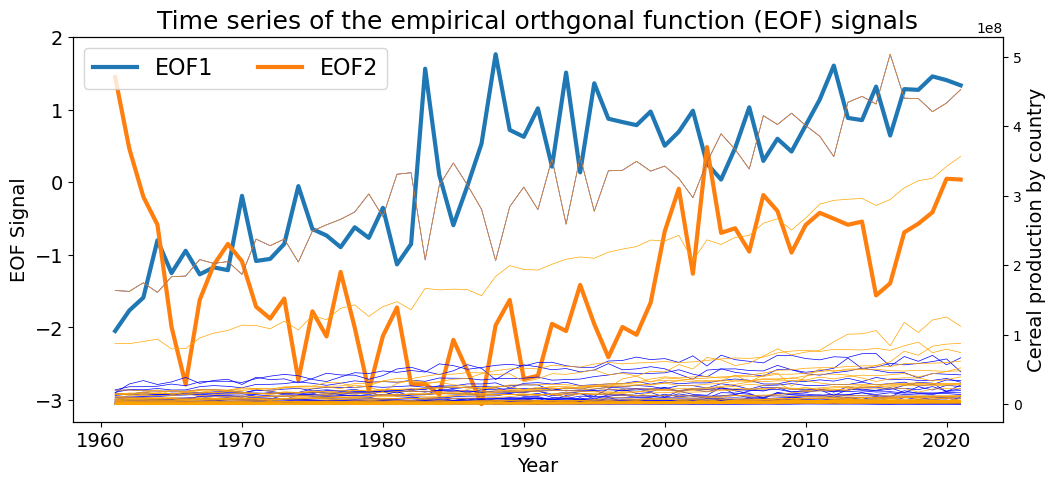

In [154]:
fig, ax = plt.subplots(figsize=(12,5))

ax.set_title('Time series of the empirical orthgonal function (EOF) signals', fontsize=18)

# EOFs
ax.plot(pcsScaled.index, eof1TimeSeries, linewidth=3, label='EOF1', zorder=2)
ax.plot(pcsScaled.index, eof2TimeSeries, linewidth=3, label='EOF2', zorder=2)

# Individual countries - as secondary axis?
ax2 = ax.twinx()
# ax2.plot(cerealData, color='k', linewidth=0.5, zorder=1)
ax2.plot(cerealData[eof1Countries], color='blue', linewidth=0.5, zorder=1)
ax2.plot(cerealData[eof2Countries], color='orange', linewidth=0.5, zorder=1)


ax.tick_params(which='both', labelsize=14)
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('EOF Signal', fontsize=14)
ax2.set_ylabel('Cereal production by country', fontsize=14)

ax.legend(fontsize=16, ncol=2, loc='upper left')


plt.show()

We see that mode 1 is a rising trend, that mirrors the obvious rising structure in the original data. The second model appears to contain an oscillation, first falling and then rising.

## 8. Plot a histogram of the eigenvectors of each mode

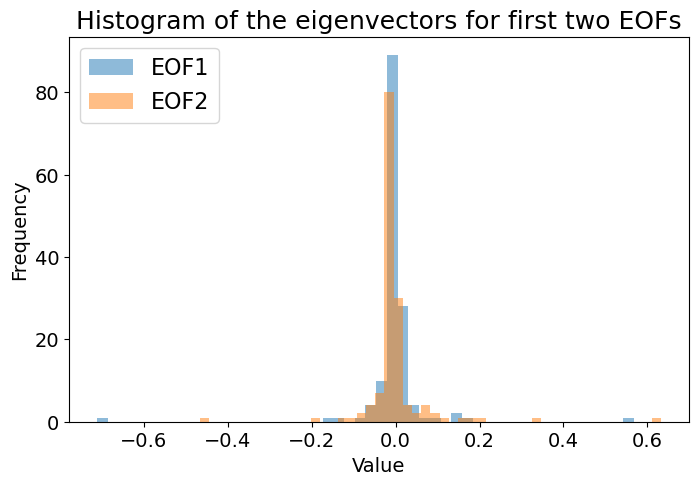

In [152]:
fig, ax = plt.subplots(figsize=(8,5))

ax.set_title('Histogram of the eigenvectors for first two EOFs', fontsize=18)

ax.hist(eof1, bins=50, alpha=0.5, label='EOF1')
ax.hist(eof2, bins=50, alpha=0.5, label='EOF2')

ax.tick_params(which='both', labelsize=14)
ax.set_xlabel('Value', fontsize=14)
ax.set_ylabel('Frequency', fontsize=14)

ax.legend(fontsize=16, loc='upper left')


plt.show()

## 9. Isolate and plot the original data associated with the minority loadigs in eigenvector #1

In [155]:
# The countries that have negative loading in EOF1
countries = [item for item in cerealZScore.columns if item not in eof1Countries]

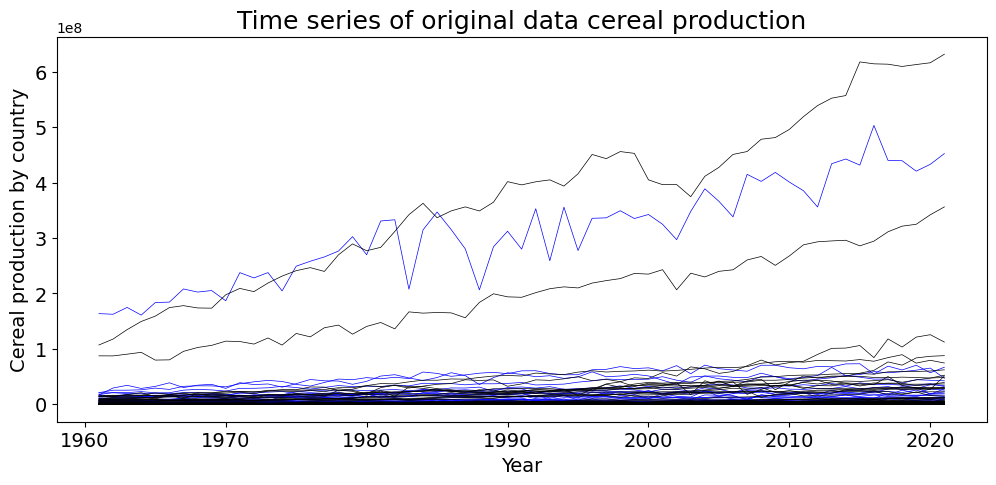

In [168]:
fig, ax = plt.subplots(figsize=(12,5))

ax.set_title('Time series of original data cereal production', fontsize=18)

# Individual countries
ax.plot(cerealData[eof1Countries], color='b', linewidth=0.5, zorder=1, label='EOF1 countries')
# ax.plot(cerealData[eof2Countries], color='orange', linewidth=0.5, zorder=1, label='EOF2 countries')
ax.plot(cerealData[countries], color='k', linewidth=0.5, zorder=1, label='Not EOF1 countries')

# Individual countries
# ax.plot(cerealZScore[eof1Countries], color='b', linewidth=0.5, zorder=1, label='EOF1 countries')
# ax.plot(cerealZScore[eof2Countries], color='orange', linewidth=0.5, zorder=1, label='EOF2 countries')
# ax.plot(cerealZScore[countries], color='k', linewidth=0.5, zorder=1, label='Not EOF1 countries')


ax.tick_params(which='both', labelsize=14)
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Cereal production by country', fontsize=14)

# ax.legend(fontsize=16, ncol=2, loc='upper left')


plt.show()

## 10. What countries are loading with the opposite sign?

## 11. Calculate the variance explained by each eigen mode
Divide the eigen values in S by the sum of the eigen values

In [172]:
expVar = (s / np.sum(s)) * 100

In [173]:
expVar

array([7.54583855e+01, 1.02681499e+01, 5.49364191e+00, 2.67475425e+00,
       1.12210225e+00, 9.57061688e-01, 8.23979635e-01, 6.05235694e-01,
       4.31231019e-01, 2.63574448e-01, 2.12633314e-01, 1.96967063e-01,
       1.86765044e-01, 1.72951312e-01, 1.45905986e-01, 1.43763816e-01,
       1.26443240e-01, 8.63568683e-02, 8.53053686e-02, 7.80247368e-02,
       7.49240063e-02, 4.96236388e-02, 4.47291679e-02, 4.01653745e-02,
       3.12765962e-02, 2.87922282e-02, 2.62178556e-02, 2.21624148e-02,
       2.15455113e-02, 1.64808322e-02, 1.46999861e-02, 1.20057766e-02,
       1.12564174e-02, 1.00254819e-02, 8.97332799e-03, 6.74920686e-03,
       6.61362680e-03, 5.82577974e-03, 4.70942212e-03, 4.20343453e-03,
       3.86482229e-03, 3.27908138e-03, 2.82815768e-03, 2.52099294e-03,
       2.03094101e-03, 1.79534221e-03, 1.57038326e-03, 1.34490495e-03,
       1.12949863e-03, 9.69164200e-04, 8.59579898e-04, 7.88251359e-04,
       6.73793424e-04, 5.50460081e-04, 4.15624533e-04, 3.61150035e-04,
      

## 12. Create a 'scree' plot showing the variance explained by each eigen rank
For the first ten eigen ranks

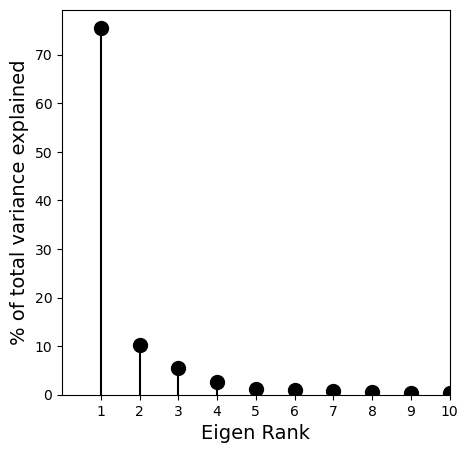

In [200]:
fig, ax = plt.subplots(figsize=(5,5))

markerline, stemlines, baseline = ax.stem(range(1, len(expVar) + 1), expVar)#, use_line_collection=True)

ax.set_xlabel('Eigen Rank', fontsize=14)
ax.set_ylabel('% of total variance explained', fontsize=14)

plt.setp(stemlines, color='k')
plt.setp(markerline, marker='o', markersize=10, color='k', zorder=2)
plt.setp(baseline, color='none', zorder=1)

ax.set_xticks(range(1, len(expVar) + 1))

ax.set_xlim(0, 10)
ax.set_ylim(bottom=0)

plt.show()

## 13. Do a simple Rule N calcultion (Overland and Preisendorfer, 1982) for the possible significance of the eigenvalues

In [207]:
# Construct a matrix of random Gaussian numbers the same size as the zscore data
randomMat = np.random.randn(cerealZScore.shape[0], cerealZScore.shape[1])

In [215]:
print('Mean of column means: {0}'.format(randomMat.mean(axis=1).mean()))
print('Mean of column stdevs: {0}'.format(randomMat.std(axis=1).mean()))

Mean of column means: 0.00941918435165725
Mean of column stdevs: 0.9996784320773678


### Repeat the steps on this new random matrix, do this for 1000 sets of random matrices

In [218]:
# Create empty list for saving eignevalues results
sAll=[]
for i in range(0, 1000):
    # Create random Gaussian matrix
    randomMat = np.random.randn(cerealZScore.shape[0], cerealZScore.shape[1])
    # Get covariance matrix
    randomCov = np.cov(randomMat, rowvar=False, ddof=1)
    # Get eigen vectors and eigen values
    U, s, Vt = np.linalg.svd(randomCov)
    # Save the eigen values
    sAll.append(s)

In [222]:
print(len(sAll), sAll[0].shape)

1000 (145,)


In [235]:
# Get the 95%ile of the random data eigenvalues, for each mode
pct=0.95
modePcts=[]
for mode in range(sAll[0].shape[0]):
    vals = [s[mode] for s in sAll]
    modePct = np.percentile(vals, pct)
    modePcts.append(modePct)

In [237]:
# Convert the 95%ile eigenvalues for each mode into explained variance
expVarRandom = (modePcts / np.sum(modePcts)) * 100

In [246]:
[expVar>expVarRandom]

[array([ True,  True,  True, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
      

In [250]:
# Determine which modes from our analysis 'pass' this significance test
modesPassed = np.array(range(1, len(expVar)+1))[expVar>expVarRandom]
print(modesPassed)

[  1   2   3  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75
  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93
  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111
 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129
 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145]


### Only the first three modes pass the significance test!

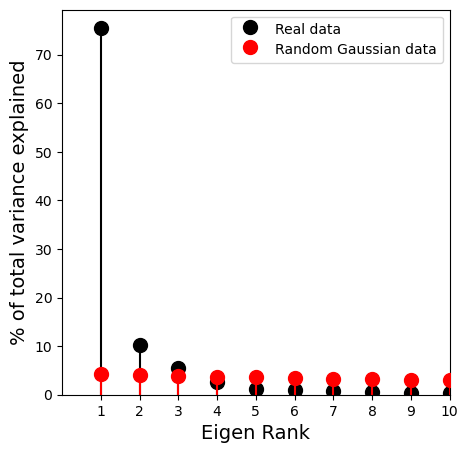

In [254]:
fig, ax = plt.subplots(figsize=(5,5))

markerline, stemlines, baseline = ax.stem(range(1, len(expVar) + 1), expVar, label='Real data')#, use_line_collection=True)

plt.setp(stemlines, color='k')
plt.setp(markerline, marker='o', markersize=10, color='k', zorder=2)
plt.setp(baseline, color='none', zorder=1)

markerline2, stemlines2, baseline2 = ax.stem(range(1, len(expVarRandom) + 1), expVarRandom, label='Random Gaussian data')
plt.setp(stemlines2, color='r')
plt.setp(markerline2, marker='o', markersize=10, color='r', zorder=3)
plt.setp(baseline2, color='none', zorder=3)


ax.set_xlabel('Eigen Rank', fontsize=14)
ax.set_ylabel('% of total variance explained', fontsize=14)
ax.set_xticks(range(1, len(expVar) + 1))
ax.set_xlim(0, 10)
ax.set_ylim(bottom=0)

ax.legend()

plt.show()

__Why might this significance test be 'too easy' to pass?__

__Does Preisendorfer suggest a way to make this a better test?__